In [1]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from keras.layers import Input,Dense,Flatten,MaxPool2D,MaxPool1D,Activation,LeakyReLU,LSTM,BatchNormalization,Dropout,Conv2D,Conv1D,Lambda
from keras.models import Model,load_model
from tensorflow.keras.optimizers import Adam
import keras.backend as K
import h5py
from tensorflow.keras.utils import to_categorical
from keras.regularizers import l2
from sklearn.utils import shuffle

# import keras
# from keras.constraints import max_norm
# import utils

from keras.constraints import max_norm
tf.random.set_seed(42)
# df=pd.read_csv("C:\\UAV detection\\Code\\notebooks\\10data\\noisy_pow\\noisy_pow_0db.csv")
# df=df.drop('Unnamed: 0',axis=1)
# df = shuffle(df)
# df=df.reset_index(drop=True)
# df1=df.copy()
# df['label']=df['label'].replace(2.0,1.0)
# df['label']=df['label'].replace(3.0,2.0)
# X=df.iloc[:,4:1024+4].values
# scaler=Normalizer()
# X=scaler.fit_transform(X)
# y=df['label'].values
# y_cat=to_categorical(y)


# def show_plots(history,model_name):
#     loss, accuracy, val_loss, val_accuracy=history.history['loss'],history.history['accuracy'], history.history['val_loss'], history.history['val_accuracy']
#     plt.figure(figsize=(15,10))

#     plt.subplot(221)
#     plt.plot(loss,label='train_loss')
#     plt.plot(val_loss,label='val_loss')
#     plt.title(f'loss curve for {model_name} model')
#     plt.legend()

#     plt.subplot(222)
#     plt.plot(accuracy,label='train_acc')
#     plt.plot(val_accuracy,label='val_acc')
#     plt.title(f'acc curve for {model_name} model')
#     plt.legend();
    
    
# X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.15, random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [2]:
import os
os.getcwd()

'E:\\dhrub_vai_pc'

In [4]:
# def iblock(filter_size,kernel,inputs):
#     x=layers.Conv1D(filter_size,kernel,padding='same')(inputs)
#     x=layers.BatchNormalization()(x)
#     x=layers.ReLU()(x)
#     x=layers.Conv1D(filter_size,kernel,padding='same')(x)
#     x=layers.BatchNormalization()(x)
# #     print(x.shape)
# #     print(inputs.shape)
#     print(f'add x {x.shape}')
#     print(f'add inputs {inputs.shape}')
#     if x.shape[-1] != inputs.shape[-1]:
#         x=layers.Dense(inputs.shape[-1])(x)
#     x=layers.Add()([x,inputs])
#     x=layers.ReLU()(x)
#     print(x.shape)
    
#     return x

# def block(kernel,inputs):
#     x=iblock(64,kernel,inputs)
# #     print(f'block inputs {x.shape}')
#     x=iblock(128,kernel,x)
# #     print(f'block x1 {x.shape}')
#     x=iblock(256,kernel,x)
# #     print(f'block x1 {x.shape}')
#     x=layers.AveragePooling1D()(x)
#     return x
    
# def network(k1,k2,k3):
#     inputs=layers.Input((1024,))
#     x=layers.Reshape((inputs.shape[-1],1))(inputs)
#     x=layers.Conv1D(64,7,padding='same',strides=2)(x)
# #     print(x.shape)
#     x=layers.BatchNormalization()(x)
#     x=layers.ReLU()(x)
#     x=layers.MaxPool1D(3,2)(x)
#     print(f'max {x.shape}')
#     x7=block(k1,x)
#     x5=block(k2,x)
#     x3=block(k3,x)
    
#     x=layers.Concatenate()([x7,x5,x3])
#     x=layers.Flatten()(x)
#     x=layers.Dropout(0.4)(x)
#     outputs=layers.Dense(4,activation='softmax')(x)
#     model=tf.keras.Model(inputs,outputs)
#     model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001) ,metrics=['accuracy'])
#     model.summary()
#     return model

# network=network(3,5,7)
   
    
    

In [5]:
def iblock(filter_size,kernel,inputs):
    x=layers.Conv1D(filter_size,kernel,padding='same')(inputs)
#     x=layers.BatchNormalization()(x)
    x=layers.ReLU()(x)
    x=layers.Conv1D(filter_size,kernel,padding='same')(x)
#     x=layers.BatchNormalization()(x)
#     print(x.shape)
#     print(inputs.shape)
#     print(f'add x {x.shape}')
#     print(f'add inputs {inputs.shape}')
    if x.shape[-1] != inputs.shape[-1]:
        x=layers.Dense(inputs.shape[-1])(x)
    x=layers.Add()([x,inputs])
    x=layers.ReLU()(x)
#     print(x.shape)
    
    return x

def block(kernel,inputs):
    x=iblock(64,kernel,inputs)
    x=iblock(64,kernel,inputs)
    
#     print(f'block inputs {x.shape}')
    x=iblock(128,kernel,x)
#     x=iblock(128,kernel,x)
    
#     print(f'block x1 {x.shape}')
    x=iblock(256,kernel,x)
    x=iblock(256,kernel,x)
#     print(f'block x1 {x.shape}')
    x=layers.AveragePooling1D()(x)
    return x
    
def network(k1,k2,k3):
    inputs=layers.Input((1024,))
    x=layers.Reshape((inputs.shape[-1],1))(inputs)
    x=layers.Conv1D(64,7,padding='same',strides=2)(x)
#     print(x.shape)
#     x=layers.BatchNormalization()(x)
    x=layers.ReLU()(x)
    x=layers.MaxPool1D(3,2)(x)
#     print(f'max {x.shape}')
#     x7=block(k1,x)
    x5=block(k2,x)
    x5=layers.Dropout(0.2)(x5)
    x3=block(k3,x)
    x3=layers.Dropout(0.2)(x3)
    
    x=layers.Add()([x5,x3])
    x=layers.Flatten()(x)
#     x=layers.Dropout(0.4)(x)
    outputs=layers.Dense(3,activation='softmax')(x)
    model=tf.keras.Model(inputs,outputs)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001) ,metrics=['accuracy'])
    model.summary()
    return model

network=network(7,5,3)
   
    
    

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1024)]       0           []                               
                                                                                                  
 reshape (Reshape)              (None, 1024, 1)      0           ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 512, 64)      512         ['reshape[0][0]']                
                                                                                                  
 re_lu (ReLU)                   (None, 512, 64)      0           ['conv1d[0][0]']                 
                                                                                              

 re_lu_8 (ReLU)                 (None, 255, 64)      0           ['add_3[0][0]']                  
                                                                                                  
 re_lu_18 (ReLU)                (None, 255, 64)      0           ['add_8[0][0]']                  
                                                                                                  
 conv1d_9 (Conv1D)              (None, 255, 256)     82176       ['re_lu_8[0][0]']                
                                                                                                  
 conv1d_19 (Conv1D)             (None, 255, 256)     49408       ['re_lu_18[0][0]']               
                                                                                                  
 re_lu_9 (ReLU)                 (None, 255, 256)     0           ['conv1d_9[0][0]']               
                                                                                                  
 re_lu_19 

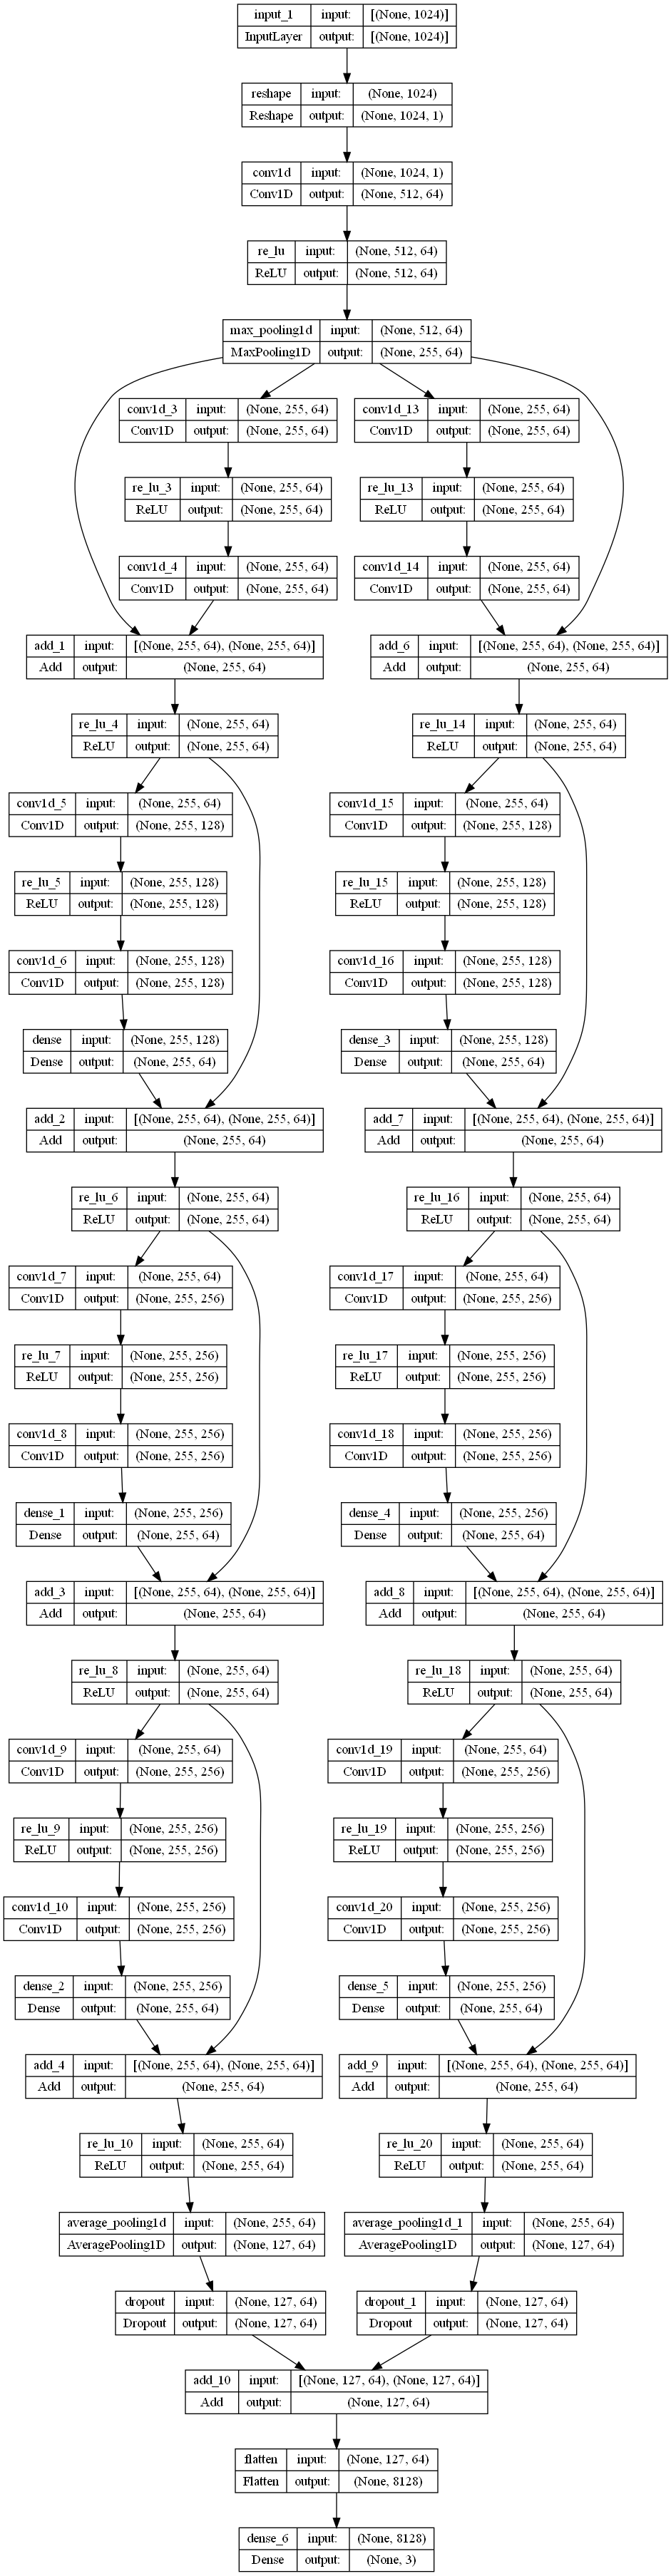

In [6]:
tf.keras.utils.plot_model(network,show_shapes=True)

In [7]:
my_callbacks = [
#     tf.keras.callbacks.EarlyStopping(restore_best_weights=True,patience=50),
    tf.keras.callbacks.ModelCheckpoint(filepath='network_comb_2_level_kernel_3_5.h5',save_best_only=True,monitor='val_accuracy'),
#     tf.keras.callbacks.ReduceLROnPlateau(patience=20),
]
history=network.fit(X_train, y_train,epochs=120, validation_data=(X_test,y_test), batch_size=512, callbacks=my_callbacks)

Epoch 1/120
708/708 [==============================] - 299s 396ms/step - loss: 0.4171 - accuracy: 0.8492 - val_loss: 0.2561 - val_accuracy: 0.9143
Epoch 2/120
708/708 [==============================] - 275s 388ms/step - loss: 0.2335 - accuracy: 0.9188 - val_loss: 0.2111 - val_accuracy: 0.9213
Epoch 3/120
708/708 [==============================] - 275s 389ms/step - loss: 0.1896 - accuracy: 0.9340 - val_loss: 0.1801 - val_accuracy: 0.9311
Epoch 4/120
708/708 [==============================] - 275s 388ms/step - loss: 0.1664 - accuracy: 0.9413 - val_loss: 0.1612 - val_accuracy: 0.9436
Epoch 5/120
708/708 [==============================] - 275s 388ms/step - loss: 0.1454 - accuracy: 0.9479 - val_loss: 0.1307 - val_accuracy: 0.9527
Epoch 6/120
708/708 [==============================] - 274s 388ms/step - loss: 0.1325 - accuracy: 0.9526 - val_loss: 0.1197 - val_accuracy: 0.9576
Epoch 7/120
708/708 [==============================] - 274s 388ms/step - loss: 0.1229 - accuracy: 0.9560 - val_loss: 0

708/708 [==============================] - 274s 387ms/step - loss: 0.0594 - accuracy: 0.9771 - val_loss: 0.0891 - val_accuracy: 0.9691
Epoch 57/120
708/708 [==============================] - 274s 387ms/step - loss: 0.0591 - accuracy: 0.9772 - val_loss: 0.0910 - val_accuracy: 0.9694
Epoch 58/120
708/708 [==============================] - 274s 388ms/step - loss: 0.0597 - accuracy: 0.9767 - val_loss: 0.0870 - val_accuracy: 0.9704
Epoch 59/120
708/708 [==============================] - 274s 387ms/step - loss: 0.0580 - accuracy: 0.9776 - val_loss: 0.0961 - val_accuracy: 0.9695
Epoch 60/120
708/708 [==============================] - 274s 387ms/step - loss: 0.0578 - accuracy: 0.9775 - val_loss: 0.0973 - val_accuracy: 0.9676
Epoch 61/120
708/708 [==============================] - 274s 387ms/step - loss: 0.0572 - accuracy: 0.9780 - val_loss: 0.0947 - val_accuracy: 0.9682
Epoch 62/120
708/708 [==============================] - 274s 387ms/step - loss: 0.0558 - accuracy: 0.9783 - val_loss: 0.0901 

708/708 [==============================] - 274s 387ms/step - loss: 0.0429 - accuracy: 0.9837 - val_loss: 0.1061 - val_accuracy: 0.9684
Epoch 112/120
708/708 [==============================] - 274s 387ms/step - loss: 0.0431 - accuracy: 0.9834 - val_loss: 0.1212 - val_accuracy: 0.9650
Epoch 113/120
708/708 [==============================] - 274s 387ms/step - loss: 0.0439 - accuracy: 0.9830 - val_loss: 0.1145 - val_accuracy: 0.9683
Epoch 114/120
708/708 [==============================] - 274s 387ms/step - loss: 0.0433 - accuracy: 0.9834 - val_loss: 0.1107 - val_accuracy: 0.9691
Epoch 115/120
708/708 [==============================] - 274s 387ms/step - loss: 0.0420 - accuracy: 0.9838 - val_loss: 0.1054 - val_accuracy: 0.9694
Epoch 116/120
708/708 [==============================] - 274s 387ms/step - loss: 0.0423 - accuracy: 0.9836 - val_loss: 0.1148 - val_accuracy: 0.9673
Epoch 117/120
708/708 [==============================] - 274s 387ms/step - loss: 0.0440 - accuracy: 0.9831 - val_loss: 0

In [22]:
hisDF=pd.DataFrame(history.history)
hisDF.to_csv('history_comb_3_class_2_level_model_3_5.csv')

In [11]:
network.save("network_comb_2_level_acc_3_5.h5")

In [13]:
network.evaluate(X_test,y_test)

1999/1999 [==============================] - 27s 13ms/step - loss: 0.1176 - accuracy: 0.9688


[0.1175554022192955, 0.9688326120376587]